# Nigerian Health Care DashBoard
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a name = "intro"></a>
## 1. Introduction

### 1.1 Objective

The objective of this project is to build a dashboard that represent the nigerian health care system ata a glance. In other to represent the health care system at a glance following feature has to be included in the dashboard along with a drop down menu to filter by state
> - Number of doctors, dentists, nurse, other health personel
> - Bubble map of number of facility, 
> - Bargraph of number of doctors, 
> - distriution of ownershipe 
> - level of facilities
> - summary table

### 1.2 Data Source
> - The data set used in notebook was scraped from https://hfr.health.gov.ng/
> - Scraping script can be found here

Data will be wrangled using python and dashboard will be build and deployed using plotly-dash

<a name = "wrangling"></a>
## 2. Data Wrangling

In [97]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [98]:
#loading data
df=pd.read_csv('./Dataset/health1.csv')
df.head(4)

,ID,State,Facility_Name,Ward,LGA,Ownership,Ownership_Type,Facility_Level,Facility_Level_Option,Physical_Location,...,Number_of_Midwifes,Number_of_Nurses_Midwifes,Number_of_him_officers,Number_of_community_health_officer,Number_of_community_extension_workers,Number_of_jun_community_extension_worker,Number_of_dental_technicians,Number_of_env_health_officers,Inpatient_care,Outpatient_care
0,48319756,Abia,Aba Holy Wounds Hospital,Ariaria,Aba North,Private,For Profit,Secondary,NaN,NaN,...,1.0,2.0,0.0,2.0,1.0,1.0,NaN,0.0,Yes,Yes
1,63964073,Abia,Chidima Hospital,Ariaria,Aba North,Private,NaN,Primary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26456575,Abia,Euna Hospital,Ariaria,Aba North,Private,For Profit,Secondary,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes
3,73938255,Abia,Goodness & Mercy hospital,Ariaria,Aba North,Private,For Profit,Secondary,NaN,NaN,...,1.0,1.0,0.0,3.0,5.0,0.0,0.0,NaN,Yes,Yes


In [99]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 39960
number of columns are: 34


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39960 entries, 0 to 39959
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        39960 non-null  int64  
 1   State                                     39960 non-null  object 
 2   Facility_Name                             39960 non-null  object 
 3   Ward                                      39945 non-null  object 
 4   LGA                                       39960 non-null  object 
 5   Ownership                                 39960 non-null  object 
 6   Ownership_Type                            32934 non-null  object 
 7   Facility_Level                            39960 non-null  object 
 8   Facility_Level_Option                     25994 non-null  object 
 9   Physical_Location                         25486 non-null  object 
 10  Postal_Address                    

In [101]:
#sum of nan by columns
(df.isnull().sum()[df.isnull().sum()> 0])/df.shape[0]

Ward                                        0.000375
Ownership_Type                              0.175826
Facility_Level_Option                       0.349499
Physical_Location                           0.362212
Postal_Address                              0.926952
Longitude                                   0.117242
Latitude                                    0.116341
Phone_Number                                0.463263
Email_Address                               0.921772
Website                                     0.999850
Total_number_of_Beds                        0.278979
Onsite_Laboratory                           0.676627
Mortuary_Services                           0.785661
Number_of_Doctors                           0.576502
Number_of_Dentists                          0.658058
Number_of_Nurses                            0.603504
Number_of_Midwifes                          0.627503
Number_of_Nurses_Midwifes                   0.603504
Number_of_him_officers                      0.

### 2.1 Handling Missing Values 

Missing values in the dataset does not neccessarly mean values are missing but rather mean zero or absent eg most rural health post are manned by communiite health extension worker CHEW with no doctors, dentist, onsit laboraratory etc values for these filed are left empty meaning zero. in the next cell, such values will be filled with zero 

In [102]:
df['Ownership_Type']=df['Ownership_Type'].fillna(value=df['Ownership_Type'].mode()[0])
df['Facility_Level_Option']=df['Facility_Level_Option'].fillna(value=df['Facility_Level'])
df['Postal_Address']=df['Postal_Address'].fillna(value='No Postal Address')
df['Phone_Number']=df['Phone_Number'].fillna(value='No Phone Number')
df['Email_Address']=df['Email_Address'].fillna(value='No Email')
df['Ward']=df['Ward'].fillna(value='ffill')
df['Website']=df['Website'].fillna(value='No Website')
df['Total_number_of_Beds']=df['Total_number_of_Beds'].fillna(value=0.0)
df['Onsite_Laboratory']=df['Onsite_Laboratory'].fillna(value='No')
df['Mortuary_Services']=df['Mortuary_Services'].fillna(value='No')
df['Number_of_Doctors']=df['Number_of_Doctors'].fillna(value=0.0)
df['Number_of_Nurses_Midwifes']=(df['Number_of_Nurses'] + df['Number_of_Midwifes']).fillna(value=0.0)
df['Number_of_Midwifes']=df['Number_of_Midwifes'].fillna(value=0.0)
df['Number_of_him_officers']=df['Number_of_him_officers'].fillna(value=0.0)
df['Number_of_community_health_officer']=df['Number_of_community_health_officer'].fillna(value=0.0)
df['Number_of_community_extension_workers']=df['Number_of_community_extension_workers'].fillna(value=0.0)
df['Number_of_jun_community_extension_worker']=df['Number_of_jun_community_extension_worker'].fillna(value=0.0)
df['Number_of_Nurses']=df['Number_of_Nurses'].fillna(value=0.0)
df['Number_of_env_health_officers']=df['Number_of_env_health_officers'].fillna(value=0.0)
df['Number_of_env_health_officers']=df['Number_of_env_health_officers'].fillna(value=0.0)
df['Number_of_dental_technicians ']=df['Number_of_dental_technicians '].fillna(value=0.0)
df['Number_of_Dentists']=df['Number_of_Dentists'].fillna(value=0.0)
df['Inpatient_care']=df['Inpatient_care'].fillna(value='No')
df['Outpatient_care']=df['Outpatient_care'].fillna(value='No')
df['Longitude']=df['Longitude'].fillna(method = 'ffill')
df['Latitude']=df['Latitude'].fillna(method = 'ffill')

In [103]:
df[df.columns[df.dtypes == 'float64']].sum()

Total_number_of_Beds                        256818.0
Number_of_Doctors                            25384.0
Number_of_Dentists                            5866.0
Number_of_Nurses                             20605.0
Number_of_Midwifes                            9170.0
Number_of_Nurses_Midwifes                    23812.0
Number_of_him_officers                       12807.0
Number_of_community_health_officer            6134.0
Number_of_community_extension_workers        42207.0
Number_of_jun_community_extension_worker     20724.0
Number_of_dental_technicians                  3460.0
Number_of_env_health_officers                12688.0
dtype: float64

### 2.2 Prepraing Data for DashBoard
> - For easier visualisation  Number_of_him_officers, Number_of_community_health_officer, Number_of_community_extension_workers Number_of_jun_community_extension_worker, Number_of_dental_technicians, Number_of_env_health_officers are combined as Number_of_other_Health_personels
> - Both rnNurse and Midwifes would be combined as nurse as both are generaly called nurse by the population
> - Health Facilutues with no personnel will be dropped
> - format cordinte to approriate datatype

In [104]:
#creating Number_of_other_Health_personels
df['Number_of_other_Health_personels'] = df['Number_of_him_officers'] + df['Number_of_community_health_officer'] +df['Number_of_community_extension_workers'] + df['Number_of_jun_community_extension_worker'] + df['Number_of_env_health_officers'] + df['Number_of_dental_technicians ']

In [105]:
# combining rnnurse and midwives
df['Number_of_Nurses']=df['Number_of_Nurses_Midwifes']

In [106]:
df=df.drop(columns=['Physical_Location','Number_of_Nurses_Midwifes','Number_of_Midwifes','Number_of_him_officers','Number_of_community_health_officer','Number_of_jun_community_extension_worker','Number_of_env_health_officers','Number_of_community_extension_workers','Number_of_dental_technicians '])
No_Medical_personel=df[df['Number_of_other_Health_personels']== 0]
df=df.drop(No_Medical_personel.index, axis=0)

In [107]:
#Dropping facilities with no health personel
No_Medical_personel=df[df['Number_of_other_Health_personels']== 0]
df=df.drop(No_Medical_personel.index, axis=0)
df = df.reset_index(drop=True)

In [108]:
df.describe()

,ID,Total_number_of_Beds,Number_of_Doctors,Number_of_Dentists,Number_of_Nurses,Number_of_other_Health_personels
count,2.815100e+04,28151.000000,28151.000000,28151.000000,28151.000000,28151.000000
mean,5.025269e+07,8.222585,0.803701,0.187951,0.783027,3.481937
std,2.173461e+07,28.727313,10.081662,6.016669,6.712176,5.963091
min,1.234649e+07,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.144286e+07,2.000000,0.000000,0.000000,0.000000,1.000000
50%,5.044440e+07,4.000000,0.000000,0.000000,0.000000,2.000000
75%,6.908048e+07,8.000000,0.000000,0.000000,0.000000,4.000000
max,8.765400e+07,2011.000000,766.000000,766.000000,382.000000,436.000000


In [109]:
# convert long and lat to approriate datatype
df['Longitude']=df['Longitude'].astype(float)
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].round(2)
df['Latitude']=df['Latitude'].round(2)

<a name = "eda"></a>
## 3. Exploratory Data Analysis

 ### 3.1 Facility_Level

In [110]:
#Facility_Level grouped by state
Facility_Level=df.groupby(by=['State','Facility_Level' ],as_index=False)['ID'].count()
Facility_Level.to_csv('./Dataset/Facility_Level.csv',index=False)

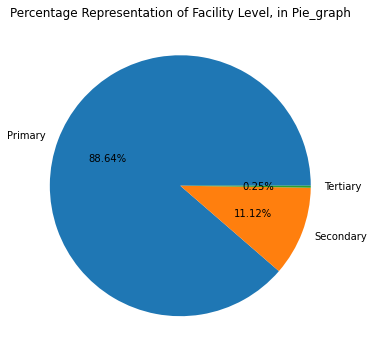

In [111]:
# Pie plot of Facility_Level
fl = df['Facility_Level'].value_counts().sort_values(ascending=False)
plt.figure(figsize = (6,6))
plt.title('Percentage Representation of Facility Level, in Pie_graph')
plt.pie(fl, labels = list(fl.index), autopct = '%1.2f%%');

- **0.25%** are of tertary level
- 88% of all facilities are of primary level
- 11% are of secondary level


## 3.2 Ownership

In [112]:
#Ownership type grouped by state
Ownership=df.groupby(by=['State', 'Ownership' ],as_index=False)['ID'].count()
Ownership.to_csv('./Dataset/Ownership.csv',index=False)

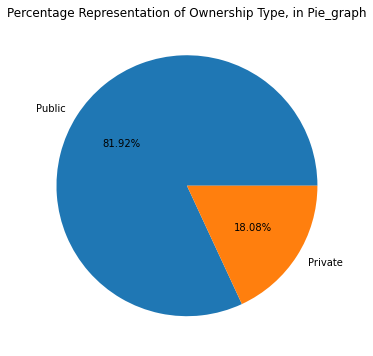

In [113]:
# Pie plot of Ownership type
ot = df['Ownership'].value_counts().sort_values(ascending=False)
plt.figure(figsize = (6,6))
plt.title('Percentage Representation of Ownership Type, in Pie_graph')
plt.pie(ot, labels = list(ot.index), autopct = '%1.2f%%');

- 82% are Goverment owned health care facilities
- 18% are privately owned 

In [114]:
df['Ownership_Type'].value_counts()

Local Government                      21038
For Profit                             4916
State Government                       1766
Not For Profit                          184
Federal Government                      151
Military & Paramilitary formations       96
Name: Ownership_Type, dtype: int64


### 3.3 Summary Table

In [115]:
#sumarrized table by state
df1=df.groupby(by='State',as_index=False)[['Number_of_Doctors','Number_of_Dentists','Number_of_Nurses','Number_of_other_Health_personels']].sum()
df1['No_of_facility']=df.groupby(by='State',as_index=False)[['ID']].count()['ID']
df1.head(4)

,State,Number_of_Doctors,Number_of_Dentists,Number_of_Nurses,Number_of_other_Health_personels,No_of_facility
0,Abia,177.0,37.0,287.0,2165.0,706
1,Adamawa,402.0,260.0,698.0,3205.0,838
2,Akwa-Ibom,345.0,64.0,107.0,953.0,374
3,Anambra,628.0,204.0,317.0,1901.0,762


In [117]:
#Getting state cordinate from state name
df1['State'].replace('Niger','Minna',inplace= True,)
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")

df1[['lat', 'long']] = df1['State'].apply(
    geolocator.geocode).apply(lambda x: pd.Series(
        [x.latitude, x.longitude], index=['lat', 'long']))
df1['State'].replace('Minna','Niger',inplace= True,)
df1.to_csv('./Dataset/state.csv',index=False)
df1.head(4)

,State,Number_of_Doctors,Number_of_Dentists,Number_of_Nurses,Number_of_other_Health_personels,No_of_facility,lat,long
0,Abia,177.0,37.0,287.0,2165.0,706,5.454095,7.515307
1,Adamawa,402.0,260.0,698.0,3205.0,838,9.512977,12.388189
2,Akwa-Ibom,345.0,64.0,107.0,953.0,374,4.988061,7.795178
3,Anambra,628.0,204.0,317.0,1901.0,762,6.218314,6.953184


In [120]:
#summerized table
df1=pd.read_csv('./Dataset/state.csv')
df1=df1.rename(columns={
    'Number_of_Doctors':'Doctors',
    'Number_of_Dentists':'Dentists',
    'Number_of_Nurses':'Nurses',
    'Number_of_other_Health_personels':'Allied',
    'No_of_facility':'Facilities'
})
df1=df1[['State','Doctors','Dentists','Nurses','Allied','Facilities']]
df1.to_csv('./Dataset/table.csv',index=False)
df1.head(4)

,State,Doctors,Dentists,Nurses,Allied,Facilities
0,Abia,177.0,37.0,287.0,2165.0,706
1,Adamawa,402.0,260.0,698.0,3205.0,838
2,Akwa-Ibom,345.0,64.0,107.0,953.0,374
3,Anambra,628.0,204.0,317.0,1901.0,762


### 3.4 Facilities by State

In [129]:
import plotly.express as px
#kolor=[ '#b3b3b3']*len(df1)
bar1 =px.bar(
    data_frame=df2,
    x='No_of_facility',
    y='State',
    orientation='h',
    title='Total by States',
    height=900,
    text='No_of_facility',
    template='plotly_dark',
)
bar1.update_layout(
    #xaxis={'categoryorder':'total descending'},
    xaxis_visible=False,
    yaxis_title=None,
    yaxis=dict(
        categoryorder='category descending',
        color="#fff",
        tickfont=dict(family='Sherif',size=12,)),
    title =  dict(
        text ='Facilities By State',
        font =dict(family='Sherif',size=11,color = '#fff'),
))
bar1.update_traces(
    marker_color=kolor,
    textposition='outside',
    textfont=dict(size=12, color='#fff' )
    )

### 3.5 Number of Doctors

In [134]:
df1=pd.read_csv('./Dataset/state.csv')
map1=px.scatter_mapbox(
    data_frame=df1,
    lat='lat',
    lon='long',
    color='State',
    size='Number_of_Doctors',
    width=900,
    template='plotly_dark',
    opacity=1,
    title='Doctors by States',
    zoom=5,
    center=dict(lat=9.0820,lon=8.6753)
)
map1.update_traces(showlegend=False, mode='lines+markers+text', text=list(df1['Number_of_Doctors']), textfont=dict(color='#fff'))
map1.update_layout(
    mapbox_style="carto-darkmatter",margin=dict(l=0, r=0, t=0, b=0))

<a name = "conclusions"></a>
## 4. Conclusions

- Healthcare in Nigeria is a concurrent responsibility of the three tiers of government in the country. Private providers of healthcare have a visible role to play in health care delivery.

-  The country is greatly underserved in the health care sphere. Health facilities (health centers, personnel, and medical equipments) are inadequate in this country, especially in rural areas.

- They are 69 tertiary health care facilitiies serving a population of over 220 million nigerian

### 4.1 Index
> - Scientific databases: the following databases were included in the search process—PubMed and African Journals Online.
> - Internet searches were based on Google and Search Nigeria